In [0]:
%matplotlib inline

import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold, train_test_split

warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 40)
random_state = 123456789

In [0]:
URL = 'https://raw.githubusercontent.com/ccny-data/College_Major_Data/master/data/IPEDS_data%20-%20Data.csv'
df = pd.read_csv(URL)

In [6]:
df.shape

(1534, 145)

In [7]:
df.sample(5)

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,Offers Two but less than 4 years certificate,Offers Bachelor's degree,Offers Postbaccalaureate certificate,Offers Master's degree,Offers Post-master's certificate,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Offers Doctor's degree - other,...,Percent of first-time undergraduates - out-of-state,Number of first-time undergraduates - foreign countries,Percent of first-time undergraduates - foreign countries,Number of first-time undergraduates - residence unknown,Percent of first-time undergraduates - residence unknown,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total",Percent of freshmen receiving any financial aid,"Percent of freshmen receiving federal, state, local or institutional grant aid",Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
258,140696,Oglethorpe University,2013,30319-2797,Master's degree,DeKalb County,-84.334756,33.875939,Not applicable,Implied no,Implied no,Implied no,Implied no,Yes,Implied no,Yes,Implied no,Implied no,Implied no,Implied no,...,NaN,NaN,NaN,NaN,NaN,55.0,61.0,62.0,97.0,97.0,38.0,38.0,6.0,52.0,97.0,81.0,81.0,8.0,NaN,18477.0
1267,224545,Texas A & M University-Texarkana,2013,75503,Master's degree,Bowie County,-94.103980,33.495610,Not applicable,Implied no,Implied no,Implied no,Implied no,Yes,Implied no,Yes,Implied no,Implied no,Implied no,Implied no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,97.0,50.0,50.0,1.0,25.0,90.0,40.0,40.0,0.0,3247.0,NaN
1023,207041,East Central University,2013,74820-6999,Master's degree,Pontotoc County,-96.664196,34.773805,Not applicable,Implied no,Yes,Implied no,Implied no,Yes,Implied no,Yes,Implied no,Implied no,Implied no,Implied no,...,1.0,19.0,3.0,43.0,7.0,17.0,30.0,34.0,85.0,77.0,50.0,50.0,2.0,40.0,43.0,42.0,42.0,1.0,966.0,NaN
580,168528,Adrian College,2013,49221-2575,Master's degree,Lenawee County,-84.059947,41.898449,United Methodist,Implied no,Implied no,Yes,Implied no,Yes,Implied no,Yes,Implied no,Implied no,Implied no,Implied no,...,NaN,NaN,NaN,NaN,NaN,39.0,53.0,54.0,98.0,98.0,50.0,50.0,47.0,57.0,97.0,85.0,85.0,10.0,NaN,16118.0
1168,216852,Widener University-Main Campus,2013,19013-5792,Doctor's degree - research/scholarship and pro...,Delaware County,-75.356718,39.861580,Not applicable,Implied no,Implied no,Yes,Implied no,Yes,Yes,Yes,Yes,Yes,Yes,Implied no,...,43.0,0.0,0.0,2.0,0.0,40.0,54.0,56.0,99.0,96.0,28.0,27.0,27.0,26.0,95.0,84.0,84.0,20.0,NaN,14327.0


In [0]:
df = df.dropna(subset=['Admissions total', 'Applicants total'])

In [0]:
df['is_religious'] = (df['Religious affiliation'] != 'Not applicable')*1
df['offers_associates'] = (df["Offers Associate's degree"] == 'Yes')*1
df['offers_bachelors'] = (df["Offers Bachelor's degree"] == 'Yes')*1
df['offers_masters'] = (df["Offers Master's degree"] == 'Yes')*1
df['is_private'] = (df['Control of institution'] == 'Private not-for-profit')*1
df['is_public'] = (df['Control of institution'] == 'Public')*1
#df['is_urban'] = (df['Degree of urbanization (Urban-centric locale)']=='City: Large')*1
#df['is_suburb'] = ('Suburb' in str(df['Degree of urbanization (Urban-centric locale)']))*1
#df['is_town'] = ('Town' in str(df['Degree of urbanization (Urban-centric locale)']))*1
#df['is_rural'] = ('Rural' in str(df['Degree of urbanization (Urban-centric locale)']))*1

In [10]:
df['Degree of urbanization (Urban-centric locale)'].value_counts()

City: Large        269
Suburb: Large      259
City: Small        199
City: Midsize      167
Town: Distant      148
Town: Remote       116
Town: Fringe        56
Rural: Fringe       47
Suburb: Midsize     47
Suburb: Small       31
Rural: Distant      25
Rural: Remote       13
Name: Degree of urbanization (Urban-centric locale), dtype: int64

In [11]:
df.sample(3)

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,Offers One but less than two years certificate,Offers Associate's degree,Offers Two but less than 4 years certificate,Offers Bachelor's degree,Offers Postbaccalaureate certificate,Offers Master's degree,Offers Post-master's certificate,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Offers Doctor's degree - other,...,"Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total",Percent of freshmen receiving any financial aid,"Percent of freshmen receiving federal, state, local or institutional grant aid",Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB),is_religious,offers_associates,offers_bachelors,offers_masters,is_private,is_public
1124,214670,Pennsylvania State University-Penn State Lehig...,2013,18034-8447,Bachelor's degree,Lehigh County,-75.401798,40.557651,Not applicable,Yes,Yes,Yes,Implied no,Yes,Implied no,Implied no,Implied no,Implied no,Implied no,Implied no,...,51.0,56.0,84.0,67.0,42.0,41.0,14.0,48.0,47.0,65.0,65.0,7.0,NaN,8406.0,0,1,1,0,0,1
629,173647,Gustavus Adolphus College,2013,56082-1498,Bachelor's degree,Nicollet County,-93.971928,44.324968,Evangelical Lutheran Church,Implied no,Implied no,Implied no,Implied no,Yes,Implied no,Implied no,Implied no,Implied no,Implied no,Implied no,...,82.0,82.0,99.0,97.0,24.0,24.0,24.0,29.0,97.0,72.0,71.0,15.0,NaN,48686.0,1,0,1,0,1,0
946,199847,Wake Forest University,2013,27106,Doctor's degree - research/scholarship and pro...,Forsyth County,-80.279004,36.135301,Not applicable,Implied no,Implied no,Implied no,Implied no,Yes,Implied no,Yes,Implied no,Yes,Yes,Implied no,...,86.0,86.0,81.0,64.0,18.0,17.0,15.0,28.0,48.0,50.0,44.0,18.0,NaN,143348.0,0,0,1,1,1,0


In [0]:
# Lots of features here, might be worth looking into finding which are most importand and trim the least important
# Note: the Total enrollment column, it has two spaces between "Total" and "enrollment".

#features = ['is_religious', 'offers_associates', 'offers_bachelors', 'offers_masters', 'Percent of freshmen submitting SAT scores', 'Percent of freshmen submitting ACT scores', 'SAT Critical Reading 25th percentile score', 
#            'SAT Critical Reading 75th percentile score', 'SAT Math 25th percentile score', 'SAT Math 75th percentile score', 'SAT Writing 25th percentile score', 'SAT Writing 75th percentile score', 
#            'ACT Composite 25th percentile score', 'ACT Composite 75th percentile score', 'Tuition and fees, 2013-14', 'Total  enrollment', 'Percent of total enrollment that are American Indian or Alaska Native',
#           'Percent of total enrollment that are Asian', 'Percent of total enrollment that are Black or African American', 'Percent of total enrollment that are Hispanic/Latino', 
#            'Percent of total enrollment that are Native Hawaiian or Other Pacific Islander', 'Percent of total enrollment that are White', 'Percent of total enrollment that are two or more races', 'Percent of total enrollment that are women',
#           'Percent of freshmen receiving any financial aid', 'Graduation rate - Bachelor degree within 4 years, total', 'Graduation rate - Bachelor degree within 6 years, total']

features = ['offers_associates', 'offers_masters', 'Percent of freshmen submitting SAT scores', 'Percent of freshmen submitting ACT scores', 'SAT Critical Reading 25th percentile score', 
            'SAT Critical Reading 75th percentile score', 'SAT Math 25th percentile score', 'SAT Math 75th percentile score', 'SAT Writing 25th percentile score', 'SAT Writing 75th percentile score', 
            'ACT Composite 25th percentile score', 'ACT Composite 75th percentile score', 'Tuition and fees, 2013-14', 'Total  enrollment', 'Graduation rate - Bachelor degree within 4 years, total', 'Graduation rate - Bachelor degree within 6 years, total']

In [0]:
model_df = df[(features + ['Percent admitted - total'])].dropna().reset_index()

train_df, holdout_df, y_train, y_holdout = train_test_split(
    model_df[features], 
    model_df['Percent admitted - total'], test_size=0.25,
    random_state=random_state)

train_df['Percent admitted - total'] = y_train
holdout_df['Percent admitted - total'] = y_holdout

train_df.reset_index(inplace=True)
holdout_df.reset_index(inplace=True)


In [0]:
k_fold = KFold(n_splits=5, random_state=random_state)

In [0]:
def get_cv_results(regressor):
    
    variance_results = []
    mae_results = []
    mse_results = []
    for train, test in k_fold.split(train_df):
        regressor.fit(train_df.loc[train, features], train_df.loc[train, 'Percent admitted - total'])
        y_predicted = regressor.predict(train_df.loc[test, features])
        
        #Accuracy score doesn't work for regression problems!
        #accuracy = accuracy_score(train_df.loc[test, 'Percent admitted - total'], y_predicted)
        y_true = train_df.loc[test, 'Percent admitted - total']
        
        explained_variance = explained_variance_score(y_true, y_predicted)
        variance_results.append(explained_variance)
        
        mae = mean_absolute_error(y_true, y_predicted)
        mae_results.append(mae)
        
        mse = mean_squared_error(y_true, y_predicted)
        mse_results.append(mse)
        
        #results.append(accuracy)
        #print(accuracy)
    
    print('Mean Squared Error mean and std:')
    print(np.mean(mse_results))
    print(np.std(mse_results))
    
    print()
    
    print('Mean Absolute Error mean and std:')
    print(np.mean(mae_results))
    print(np.std(mae_results))
    
    print()
    
    print('Explained variance mean and std:')
    print(np.mean(variance_results))
    print(np.std(variance_results))
    

# Range of Acceptance Rates

(array([ 23.,  28.,  47.,  81., 140., 245., 275., 289., 153.,  95.]),
 array([  6. ,  15.4,  24.8,  34.2,  43.6,  53. ,  62.4,  71.8,  81.2,
         90.6, 100. ]),
 <a list of 10 Patch objects>)

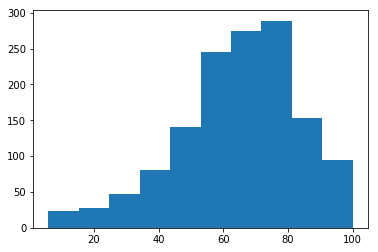

In [30]:
plt.hist(df['Percent admitted - total'])

The acceptance rates of all the schools within the data set are relatively normally distributed.

In [41]:
print(np.mean(df['Percent admitted - total']))

64.56976744186046


In [40]:
print(np.std(df['Percent admitted - total']))

18.703261559663115


# Lets Test Some Models!

In [33]:
logreg = LogisticRegression(
    random_state=random_state, 
    solver='lbfgs'
)

get_cv_results(logreg)

Mean Squared Error mean and std:
528.3770918268298
60.443375651891074

Mean Absolute Error mean and std:
17.69671908367307
1.0449612091238318

Explained variance mean and std:
-0.31459268844262145
0.21373211167532624


In [34]:
dtree = DecisionTreeRegressor(
    random_state=random_state, 
    #max_depth=max_depth
)

get_cv_results(dtree)

Mean Squared Error mean and std:
306.5442632498544
28.189107426666496

Mean Absolute Error mean and std:
13.405261114346729
0.5052457269638423

Explained variance mean and std:
0.25143308383103713
0.09800043960061258


In [36]:
rforest = RandomForestRegressor(
    random_state=random_state, 
    #max_depth=max_depth,
    n_estimators=100
)

get_cv_results(rforest)

Mean Squared Error mean and std:
188.000384096292
9.07454250047954

Mean Absolute Error mean and std:
10.451913414870898
0.29077368478825905

Explained variance mean and std:
0.5381962304803174
0.037101360600514215


In [37]:
gbm = GradientBoostingRegressor(
    random_state=random_state, 
    #max_depth=max_depth,
    n_estimators=100
)

get_cv_results(gbm)

Mean Squared Error mean and std:
198.17334418665817
15.1410198682038

Mean Absolute Error mean and std:
10.807048946270617
0.44741076509848365

Explained variance mean and std:
0.5151266772788544
0.03650882985216814


In [45]:
dummy = DummyRegressor(strategy='median')
get_cv_results(dummy)

Mean Squared Error mean and std:
413.20818287711126
32.056661057291834

Mean Absolute Error mean and std:
15.703203261502622
0.8085904217848633

Explained variance mean and std:
0.0
0.0
